In [1]:
# Import data from 9 charts

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

customers = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_customers_dataset.csv')
sellers = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_sellers_dataset.csv')
geolocation = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_geolocation_dataset.csv')
order_items = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_orders_dataset.csv')
products = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/olist_products_dataset.csv')
product_category_name = pd.read_csv('/Users/shiyudie/Desktop/Machine Learning /IMA /brazilian-ecommerce/product_category_name_translation.csv')

/var/folders/r9/t445bfh14q7d95jv3f45xzhw0000gn/T/ipykernel_91062/3992694282.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Merge data by using "outer"

#1 Merge order items and products into "df" by using "product id"
df = pd.merge(order_items,products,on='product_id',how='outer')

#2 Merge df and sellers by using "seller_id"
df = pd.merge(df,sellers,on='seller_id',how='outer')

#3 Merge df and orders by using "order_id"
df = pd.merge(df,orders,on='order_id',how='outer')

#4 Merge df and customers by using "customers_id"
df = pd.merge(df,customers,on='customer_id',how='outer')

#5 Merge df and order_review by using "order_id"
df = pd.merge(df,order_reviews,on='order_id',how='outer')

#6 Merge df and order_payment by using "order_id"
df = pd.merge(df,order_payments,on='order_id',how='outer')

#7 Merge df and prodcut_category_name by using "product_category_name"
df = df.merge(product_category_name, on='product_category_name', how='outer')

In [4]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,...,5.0,NaN,"Perfeito, produto entregue antes do combinado.",21/09/2017 00:00,22/09/2017 10:57,1.0,credit_card,2.0,72.19,cool_stuff
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,...,5.0,NaN,"lannister como sempre, entregou certinho e den...",14/07/2017 00:00,17/07/2017 12:50,1.0,boleto,1.0,73.86,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,...,NaN,NaN,NaN,NaN,NaN,1.0,credit_card,2.0,83.23,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,...,5.0,NaN,NaN,10/08/2017 00:00,13/08/2017 03:35,1.0,credit_card,3.0,75.07,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,...,5.0,NaN,NaN,25/08/2017 00:00,28/08/2017 00:51,1.0,credit_card,4.0,72.19,cool_stuff


In [5]:
df.shape

(119011, 40)

In [6]:
# As product_category_name is not using English，so we use data in product_category_name_english

df['product_category_name'] = df['product_category_name_english']

df = df.drop('product_category_name_english',axis=1)

# Dealing with chart: geolocation

In [7]:
# finding number of duplicated rows
geolocation.duplicated().sum()

143891

In [8]:
# removing redundant rows
geolocation = geolocation.drop_duplicates()

In [9]:
# calculate mean_lat and mean_lng based on geolocation_zip_code_prefix

mean_lat = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lat'].mean().reset_index()
mean_lng = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lng'].mean().reset_index()

mean_lat.rename(columns={'geolocation_lat': 'mean_lat'}, inplace=True)
mean_lng.rename(columns={'geolocation_lng': 'mean_lng'}, inplace=True)

#creat new dataframe to put mean_let and mean_lng
geolocation_mean = pd.merge(mean_lat, mean_lng, on='geolocation_zip_code_prefix')

In [10]:
geolocation_mean.head()

,geolocation_zip_code_prefix,mean_lat,mean_lng
0,1001,-23.550227,-46.634039
1,1002,-23.547657,-46.634991
2,1003,-23.549000,-46.635582
3,1004,-23.549829,-46.634792
4,1005,-23.549547,-46.636406


**Considering calculate sellers' mean lat and lng, and integrating them into df**

In [11]:
# Using inner merge as geolocation_zip_code_prefix conclude sellers' geo and buyers'geo

df_sellergeo = pd.merge(df, geolocation_mean, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df_sellergeo.rename(columns={
    'mean_lat' : 'seller_lat',
    'mean_lng' : 'seller_lng'
}, inplace=True)

df_sellergeo.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

**Generate 2 new features: seller_lat and seller_lng**

In [12]:
df_sellergeo.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_lat,seller_lng
0,e6293b688f0d1387e634ae8841feca17,2.0,db12039c7ff4e850d48e0312fa9b3473,46dc3b2cc0980fb8ec44634e21d2718e,2017-05-22 11:35:21,50.99,19.45,cool_stuff,23.0,652.0,...,NaN,Nao recebi um dos produtos. o pedido veio inco...,27/05/2017 00:00,30/05/2017 01:10,2.0,voucher,1.0,26.16,-22.935434,-43.187461
1,e6293b688f0d1387e634ae8841feca17,2.0,db12039c7ff4e850d48e0312fa9b3473,46dc3b2cc0980fb8ec44634e21d2718e,2017-05-22 11:35:21,50.99,19.45,cool_stuff,23.0,652.0,...,NaN,Nao recebi um dos produtos. o pedido veio inco...,27/05/2017 00:00,30/05/2017 01:10,1.0,credit_card,10.0,125.08,-22.935434,-43.187461
2,085b1f163267ab9db88bb6b4145e0df7,1.0,aced2206d8778eefdbef4de3c38ae916,46dc3b2cc0980fb8ec44634e21d2718e,2018-01-25 08:32:31,249.99,16.50,cool_stuff,53.0,289.0,...,NaN,NaN,09/02/2018 00:00,11/02/2018 17:56,1.0,credit_card,1.0,23.54,-22.935434,-43.187461
3,085b1f163267ab9db88bb6b4145e0df7,1.0,aced2206d8778eefdbef4de3c38ae916,46dc3b2cc0980fb8ec44634e21d2718e,2018-01-25 08:32:31,249.99,16.50,cool_stuff,53.0,289.0,...,NaN,NaN,09/02/2018 00:00,11/02/2018 17:56,2.0,voucher,1.0,242.95,-22.935434,-43.187461
4,643440e9eec13f7a1e08f634486e931b,1.0,aced2206d8778eefdbef4de3c38ae916,46dc3b2cc0980fb8ec44634e21d2718e,2018-02-19 16:47:54,249.99,15.50,cool_stuff,53.0,289.0,...,NaN,NaN,01/03/2018 00:00,02/03/2018 12:06,1.0,credit_card,3.0,265.49,-22.935434,-43.187461


**Considering calculate customers' mean lat and lng, and integrating them into df**

In [13]:
# Using inner merge as geolocation_zip_code_prefix conclude sellers' geo and buyers'geo
df_geo = pd.merge(df_sellergeo, geolocation_mean, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
df_geo.rename(columns={
    'mean_lat' : 'customer_lat',
    'mean_lng' : 'customer_lng'
}, inplace=True)

df_geo.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

# renaming final
df = df_geo

**Generate 2 new features: customer_lat and cuatomer_lng**

In [14]:
df.shape

(44041, 43)

In [15]:
df1 = df[['customer_lat', 'customer_lng', 'customer_zip_code_prefix', 'seller_zip_code_prefix', 'seller_lat', 'seller_lng']]
df1.head()

,customer_lat,customer_lng,customer_zip_code_prefix,seller_zip_code_prefix,seller_lat,seller_lng
0,-23.63519,-45.425152,11665,22240.0,-22.935434,-43.187461
1,-23.63519,-45.425152,11665,22240.0,-22.935434,-43.187461
2,-23.63519,-45.425152,11665,14940.0,-21.757225,-48.829541
3,-23.63519,-45.425152,11665,7032.0,-23.504750,-46.553896
4,-23.63519,-45.425152,11665,13360.0,-22.997441,-47.505905


In [16]:
df['seller_zip_code_prefix'].astype(int)

0        22240
1        22240
2        14940
3         7032
4        13360
         ...  
44036     3187
44037     2839
44038     7791
44039    15806
44040     4296
Name: seller_zip_code_prefix, Length: 44041, dtype: int64

**As we get the data of customers' and sellers' lat and lng,then we can use geopy function to calculate distance bewteen sellers and buyers;**

**The reference of geopy.distance is :**
Kostya Esmukov(2023) Available at: https://github.com/geopy/geopy?tab=readme-ov-file

**Generate a new feature: distance**

In [17]:
from geopy.distance import geodesic

# Using tuple to get data by using zip function to make sure that the latitude and longitude correspond to each other:
customer_info = list(zip(df['customer_lat'], df['customer_lng']))
seller_info = list(zip(df['seller_lat'], df['seller_lng']))

# calculate distance between sellers and buyers
df['distance'] = [geodesic(c, s).kilometers for c, s in zip(customer_info, seller_info)]

df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,seller_lat,seller_lng,customer_lat,customer_lng,distance
0,085b1f163267ab9db88bb6b4145e0df7,1.0,aced2206d8778eefdbef4de3c38ae916,46dc3b2cc0980fb8ec44634e21d2718e,2018-01-25 08:32:31,249.99,16.50,cool_stuff,53.0,289.0,...,11/02/2018 17:56,1.0,credit_card,1.0,23.54,-22.935434,-43.187461,-23.63519,-45.425152,241.685839
1,085b1f163267ab9db88bb6b4145e0df7,1.0,aced2206d8778eefdbef4de3c38ae916,46dc3b2cc0980fb8ec44634e21d2718e,2018-01-25 08:32:31,249.99,16.50,cool_stuff,53.0,289.0,...,11/02/2018 17:56,2.0,voucher,1.0,242.95,-22.935434,-43.187461,-23.63519,-45.425152,241.685839
2,f623347913bab0b18cc51aa736f16c2d,1.0,5b226d7c52f86ac72457617f78cff95d,1835b56ce799e6a4dc4eddc053f04066,2018-01-26 14:12:44,56.99,12.74,bed_bath_table,50.0,381.0,...,03/02/2018 13:53,1.0,credit_card,2.0,69.73,-21.757225,-48.829541,-23.63519,-45.425152,406.927052
3,a06e15e85714e87cb14e805b04c476f2,1.0,8a7ad449048d596dc042ad6dfe5e8386,fcb5ace8bcc92f75707dc0f01a27d269,2018-07-25 13:44:27,59.85,13.08,cool_stuff,48.0,1087.0,...,30/07/2018 21:58,1.0,debit_card,1.0,72.93,-23.504750,-46.553896,-23.63519,-45.425152,116.131805
4,82e3b58b34d2201715bd1531310615bf,1.0,afad7a4420a4348d41da23ed8d0902dd,3481aa57cd91f9f9d3fa1fa12d9a3bf7,2017-08-18 18:05:26,76.45,29.33,furniture_decor,37.0,768.0,...,23/08/2017 00:35,1.0,credit_card,10.0,105.78,-22.997441,-47.505905,-23.63519,-45.425152,224.234266


In [18]:
# As we have used information of buyers' and sellers' lat and lng，then we can drop some column:

df = df.drop(df[['customer_lat','customer_lng','seller_lng','seller_lat']],axis = 1)

In [19]:
df.shape

(44041, 40)

# Data cleaning and featuring engineer in each chart：

In [ ]:
# number of redundant rows
df.duplicated().sum()

0

### order_reviews_dataset ：

In [ ]:
# finding the number of nulls in review_score: As rebiew_score is our target variables:
df['review_score'].isnull().sum()

11616

In [ ]:
# Delete rows that have missing value in review_score
df.dropna(subset=['review_score'], inplace=True)

In [ ]:
# Delete irrelevant column
df = df.drop(df[['review_id','review_comment_title','review_comment_message']], axis=1)
df.shape

(105983, 37)

### Generate 2 features: Review scores based on sellers and products:

In [ ]:
# Aggregate review_score from the same seller and calculate numbers of orders

# Calculate seller's ratings and product sold counts by using groupby and aggregate function:

seller_grouped = df.groupby('seller_id')[['review_score', 'order_id']].agg({'review_score': 'mean', 'order_id': 'count'})
seller_grouped.rename(columns={'review_score': 'seller_rating', 'order_id': 'product_sold_by_seller'}, inplace=True)

# Calculate products' ratings using groupby and aggregate function:

product_grouped = df.groupby('product_id')['review_score'].mean().reset_index()
product_grouped.rename(columns={'review_score': 'product_rating'}, inplace=True)

# Merge the calculated results into the original DataFrame

df = df.merge(seller_grouped, on='seller_id', how='left')
df = df.merge(product_grouped, on='product_id', how='left')

In [ ]:
seller_grouped.head()

,seller_rating,product_sold_by_seller
seller_id,,
0015a82c2db000af6aaaf3ae2ecb0532,3.666667,3
001cca7ae9ae17fb1caed9dfb1094831,3.871681,226
001e6ad469a905060d959994f1b41e4f,1.000000,1
002100f778ceb8431b7a1020ff7ab48f,4.017857,56
003554e2dce176b5555353e4f3555ac8,5.000000,1


In [ ]:
product_grouped.head()

,product_id,product_rating
0,00066f42aeeb9f3007548bb9d3f33c38,5.0
1,00088930e925c41fd95ebfe695fd2655,4.0
2,0009406fd7479715e4bef61dd91f2462,1.0
3,000b8f95fcb9e0096488278317764d19,5.0
4,000d9be29b5207b54e86aa1b1ac54872,5.0


In [ ]:
df.shape

(105983, 40)

### orders_dataset:

In [ ]:
# finding the number of nulls in rows in orders_dataset
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [ ]:
# finding the number of nulls in df
df[['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].isnull().sum()

order_approved_at                  14
order_delivered_carrier_date     1086
order_delivered_customer_date    2257
dtype: int64

In [ ]:
# Drop missing value
df.dropna(subset=['order_approved_at','order_delivered_carrier_date','order_delivered_customer_date'], inplace=True)

In [ ]:
# Convert release_date format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [ ]:
columns_to_convert = df[['order_purchase_timestamp', 'order_approved_at',
                                'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']]

for column in columns_to_convert:
    df[column] = pd.to_datetime(df[column])

**Generate 5 features**

In [ ]:
# Response time of system,:
df["Response_time"] =(df['order_approved_at']-df['order_purchase_timestamp']).dt.days

# Order dispatch time
df["Order_dispatch_time"] =(df['order_delivered_carrier_date']-df['order_approved_at']).dt.days

# Shipping time
df["Shipping_time"] =(df['order_delivered_customer_date']-df['order_delivered_carrier_date']).dt.days

# Order delivery time
df["Order_delivery_time"] =(df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days

# Lead time
df["Lead_time"] =(df['order_estimated_delivery_date']-df['order_delivered_customer_date']).dt.days

In [ ]:
df.shape

(103711, 39)

### order_items & order_products:

Keep product_id, product_category_name, Aggregate_(product_name_lenght,product_description_lenght,product_photos_qty,price and freight_value)

In [ ]:
# Find the features with null values
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [ ]:
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [ ]:
# Drop irrelevant column

# As weight, length,height and width are more related to freight_value while we have had the freight price:
df = df.drop(['product_weight_g', 'product_length_cm','product_height_cm','product_width_cm','order_item_id'], axis=1)
df = df.drop('shipping_limit_date',axis = 1)

In [ ]:
# finding the number of nulls
df[['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty']].isnull().sum()

product_category_name         1480
product_name_lenght           1460
product_description_lenght    1460
product_photos_qty            1460
dtype: int64

In [ ]:
df.dropna(subset=['product_category_name','product_name_lenght','product_description_lenght','product_photos_qty'], inplace=True)

In [ ]:
## Aggregate price and freight_value by using sum value

price_grouped = df.groupby('order_id')['price'].sum().reset_index()
price_grouped.rename(columns={'price': 'Aggregate_price'}, inplace=True)

df = df.merge(price_grouped, on='order_id', how='left')
df = df.drop('price',axis = 1)

freight_value_grouped = df.groupby('order_id')['freight_value'].sum().reset_index()
freight_value_grouped.rename(columns={'freight_value': 'Aggregate_freight_value'}, inplace=True)

df = df.merge(freight_value_grouped, on='order_id', how='left')
df = df.drop('freight_value',axis = 1)

In [ ]:
# Aggregate product_name_lenght,product_description_lenght,product_photos_qty by using mean value

grouped = df.groupby('order_id').agg({'product_name_lenght': 'mean',
                                      'product_description_lenght': 'mean',
                                    'product_photos_qty':'mean'}).reset_index()

grouped.rename(columns={'product_name_lenght': 'Aggregate_product_name_lenght',
                        'product_description_lenght': 'Aggregate_product_description_lenght',
                        'product_photos_qty':'Aggregate_product_photos_qty'}, inplace=True)

df = df.merge(grouped, on='order_id', how='left')

df = df.drop(['product_name_lenght', 'product_description_lenght','product_photos_qty'], axis=1)


In [ ]:
df.shape

(102231, 33)

### Payment:

In [ ]:
#check the data types
print(order_payments.dtypes)
order_payments

order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [ ]:
# Check if there are not_defined payment_type in dataset
filtered_rows = df[(df['payment_type'] == 'not_defined')]
print(filtered_rows)

Empty DataFrame
Columns: [order_id, product_id, seller_id, product_category_name, seller_zip_code_prefix, seller_city, seller_state, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, review_score, review_creation_date, review_answer_timestamp, payment_sequential, payment_type, payment_installments, payment_value, distance, seller_rating, product_sold_by_seller, product_rating, Response_time, Order_dispatch_time, Shipping_time, Order_delivery_time, Lead_time, Aggregate_price, Aggregate_freight_value, Aggregate_product_name_lenght, Aggregate_product_description_lenght, Aggregate_product_photos_qty]
Index: []

[0 rows x 33 columns]


In [ ]:
# check the missing data
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [ ]:
df[['order_id','payment_sequential','payment_type','payment_installments','payment_value']].isnull().sum()

order_id                0
payment_sequential      3
payment_type            3
payment_installments    3
payment_value           3
dtype: int64

In [ ]:
df.dropna(subset=['payment_sequential','payment_type','payment_installments','payment_value'], inplace=True)

In [ ]:
# Drop payment_sequential as it is irrelevant column
df = df.drop('payment_sequential',axis = 1)

In [ ]:
# payment type
# define a function to check whether voucher is contained
def contains_word(s,word):
  return 1 if word in s.lower() else 0
# word to check
word_to_check = 'voucher'

order_payments['ContainsWord'] = order_payments['payment_type'].apply(contains_word,args=(word_to_check,))

# droup the deplicate order id
df_type = order_payments.groupby(['order_id'],as_index=False)['ContainsWord'].sum()
df_type

,order_id,ContainsWord
0,00010242fe8c5a6d1ba2dd792cb16214,0
1,00018f77f2f0320c557190d7a144bdd3,0
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,0
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,0
99436,fffcd46ef2263f404302a634eb57f7eb,0
99437,fffce4705a9662cd70adb13d4a31832d,0
99438,fffe18544ffabc95dfada21779c9644f,0


**Generate a new feature: Use_Discount**

If buyers use voucher, it means they use dicount and we code this kind of paying method as 1

In [ ]:
# Use Discount or not: 0 = not use; 1 = used
df_type['Use_Discount'] = [1 if value > 0 else 0 for value in df_type['ContainsWord']]
df_type = df_type.drop(['ContainsWord'], axis=1)

df_type

,order_id,Use_Discount
0,00010242fe8c5a6d1ba2dd792cb16214,0
1,00018f77f2f0320c557190d7a144bdd3,0
2,000229ec398224ef6ca0657da4fc703e,0
3,00024acbcdf0a6daa1e931b038114c75,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,0
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,0
99436,fffcd46ef2263f404302a634eb57f7eb,0
99437,fffce4705a9662cd70adb13d4a31832d,0
99438,fffe18544ffabc95dfada21779c9644f,0


In [ ]:
df_type['Use_Discount'].dtype

dtype('int64')

In [ ]:
# added payment value
df_sum = order_payments.groupby(['order_id'],as_index=False)['payment_value'].sum()

df_sum

,order_id,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,72.19
1,00018f77f2f0320c557190d7a144bdd3,259.83
2,000229ec398224ef6ca0657da4fc703e,216.87
3,00024acbcdf0a6daa1e931b038114c75,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40
99436,fffcd46ef2263f404302a634eb57f7eb,386.53
99437,fffce4705a9662cd70adb13d4a31832d,116.85
99438,fffe18544ffabc95dfada21779c9644f,64.71


In [ ]:
# number of installments
df_max = order_payments.groupby(['order_id'],as_index=False)['payment_installments'].max()

df_max

,order_id,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,2
1,00018f77f2f0320c557190d7a144bdd3,3
2,000229ec398224ef6ca0657da4fc703e,5
3,00024acbcdf0a6daa1e931b038114c75,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,3
...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,1
99436,fffcd46ef2263f404302a634eb57f7eb,1
99437,fffce4705a9662cd70adb13d4a31832d,3
99438,fffe18544ffabc95dfada21779c9644f,3


In [ ]:
# join the payment value, payment installments and use discount or not
merged1=pd.merge(df_sum,df_max,on='order_id')
df_payments = pd.merge(merged1, df_type, on='order_id')
df_payments

,order_id,payment_value,payment_installments,Use_Discount
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,2,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,3,0
2,000229ec398224ef6ca0657da4fc703e,216.87,5,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,2,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,3,0
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,1,0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,1,0
99437,fffce4705a9662cd70adb13d4a31832d,116.85,3,0
99438,fffe18544ffabc95dfada21779c9644f,64.71,3,0


In [ ]:
df = df.drop(['payment_installments','payment_value'],axis = 1)

In [ ]:
df = pd.merge(df,df_payments,on='order_id',how='outer')

In [ ]:
df.head()

,order_id,product_id,seller_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,...,Order_delivery_time,Lead_time,Aggregate_price,Aggregate_freight_value,Aggregate_product_name_lenght,Aggregate_product_description_lenght,Aggregate_product_photos_qty,payment_value,payment_installments,Use_Discount
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,27277.0,volta redonda,SP,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,...,7.0,8.0,58.9,13.29,58.0,598.0,4.0,72.19,2,0
1,bd31b009e1dbc47fc7c250b1e2cf5440,92e2d2146e433cd4d1f09a3f8633ead0,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,ibitinga,SP,2c23918ee23c1406b9cb5f78d4b2062a,8d500d527a1d67efec12faf28b61885b,28013.0,...,14.0,12.0,52.9,22.95,53.0,714.0,1.0,75.85,1,0
2,bb4eb0196897c20281a61f75ce23211c,8cee1d824765335c48ccc515c2ecf4b8,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,ibitinga,SP,c7d65abc07da65a413738fc854d8112a,81fde78227bbac716944e215b6895639,28013.0,...,10.0,11.0,96.0,15.42,54.0,385.0,2.0,111.42,9,0
3,f9847bf9cc7336c6ba07fe2bdbb6cae1,3e5201fe0d1ba474d9b90152c83c706c,8160255418d5aaa7dbdc9f4c64ebda44,bed_bath_table,14940.0,ibitinga,SP,c5a8686eefdcb86e4216dc46cec8b81f,592fa32dca4f04d098afdc9912bd0629,28013.0,...,12.0,12.0,125.9,13.30,56.0,255.0,1.0,139.20,6,0
4,5c94ad4e194c0e6794688a9d2b9ea94b,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,health_beauty,13405.0,piracicaba,SP,ad6acb9e0ffc35906b64d488bbdb6d5a,ca50300f552f1bc9b5aa898a29382d69,28013.0,...,31.0,-11.0,29.9,18.23,55.0,388.0,1.0,48.13,1,0


**Generate a new feature: payment_speed**

if buyers' installment is equal to less than 2,we set value is 1

In [ ]:
# If payment_installments < 2, it shows a strong paying ability, so we generate a dummy variable of installment

df['payment_speed']= [1 if value < 2 else 0 for value in df['payment_installments']]

df.head()

,order_id,product_id,seller_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,...,Order_delivery_time,Lead_time,Aggregate_price,Aggregate_freight_value,Aggregate_product_name_lenght,Aggregate_product_description_lenght,Aggregate_product_photos_qty,payment_value,payment_installments,Use_Discount
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,27277.0,volta redonda,SP,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,...,7.0,8.0,58.9,13.29,58.0,598.0,4.0,72.19,0,0
1,bd31b009e1dbc47fc7c250b1e2cf5440,92e2d2146e433cd4d1f09a3f8633ead0,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,ibitinga,SP,2c23918ee23c1406b9cb5f78d4b2062a,8d500d527a1d67efec12faf28b61885b,28013.0,...,14.0,12.0,52.9,22.95,53.0,714.0,1.0,75.85,1,0
2,bb4eb0196897c20281a61f75ce23211c,8cee1d824765335c48ccc515c2ecf4b8,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,ibitinga,SP,c7d65abc07da65a413738fc854d8112a,81fde78227bbac716944e215b6895639,28013.0,...,10.0,11.0,96.0,15.42,54.0,385.0,2.0,111.42,0,0
3,f9847bf9cc7336c6ba07fe2bdbb6cae1,3e5201fe0d1ba474d9b90152c83c706c,8160255418d5aaa7dbdc9f4c64ebda44,bed_bath_table,14940.0,ibitinga,SP,c5a8686eefdcb86e4216dc46cec8b81f,592fa32dca4f04d098afdc9912bd0629,28013.0,...,12.0,12.0,125.9,13.30,56.0,255.0,1.0,139.20,0,0
4,5c94ad4e194c0e6794688a9d2b9ea94b,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,health_beauty,13405.0,piracicaba,SP,ad6acb9e0ffc35906b64d488bbdb6d5a,ca50300f552f1bc9b5aa898a29382d69,28013.0,...,31.0,-11.0,29.9,18.23,55.0,388.0,1.0,48.13,1,0


### Target Variable：Review_class

1. The first step is aggregate scores based on each unique order_id.
2. The second step is generate target variable: review_class. When socre is higher than 3 socre, we use 1,otherwise we will use 0

In [ ]:
# generate Aggregate score that from the same order:

review_grouped = df.groupby('order_id')['review_score'].mean().reset_index()
review_grouped.rename(columns={'review_score': 'Aggregate_score'}, inplace=True)

df = df.merge(review_grouped, on='order_id', how='left')

In [ ]:
# generate review_class: if aggregate_score is larger than 3, we give it 1, on the other hand, we give it 0
df['review_class']= [1 if value > 3 else 0 for value in df['Aggregate_score']]

In [ ]:
df = df.drop(df[['review_score','Aggregate_score']],axis = 1)

In [ ]:
df.head()

,order_id,product_id,seller_id,product_category_name,seller_zip_code_prefix,seller_city,seller_state,customer_id,customer_unique_id,customer_zip_code_prefix,...,Lead_time,Aggregate_price,Aggregate_freight_value,Aggregate_product_name_lenght,Aggregate_product_description_lenght,Aggregate_product_photos_qty,payment_value,payment_installments,Use_Discount,review_class
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,cool_stuff,27277.0,volta redonda,SP,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,...,8.0,58.9,13.29,58.0,598.0,4.0,72.19,0,0,1
1,bd31b009e1dbc47fc7c250b1e2cf5440,92e2d2146e433cd4d1f09a3f8633ead0,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,ibitinga,SP,2c23918ee23c1406b9cb5f78d4b2062a,8d500d527a1d67efec12faf28b61885b,28013.0,...,12.0,52.9,22.95,53.0,714.0,1.0,75.85,1,0,0
2,bb4eb0196897c20281a61f75ce23211c,8cee1d824765335c48ccc515c2ecf4b8,4a3ca9315b744ce9f8e9374361493884,bed_bath_table,14940.0,ibitinga,SP,c7d65abc07da65a413738fc854d8112a,81fde78227bbac716944e215b6895639,28013.0,...,11.0,96.0,15.42,54.0,385.0,2.0,111.42,0,0,1
3,f9847bf9cc7336c6ba07fe2bdbb6cae1,3e5201fe0d1ba474d9b90152c83c706c,8160255418d5aaa7dbdc9f4c64ebda44,bed_bath_table,14940.0,ibitinga,SP,c5a8686eefdcb86e4216dc46cec8b81f,592fa32dca4f04d098afdc9912bd0629,28013.0,...,12.0,125.9,13.30,56.0,255.0,1.0,139.20,0,0,1
4,5c94ad4e194c0e6794688a9d2b9ea94b,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,health_beauty,13405.0,piracicaba,SP,ad6acb9e0ffc35906b64d488bbdb6d5a,ca50300f552f1bc9b5aa898a29382d69,28013.0,...,-11.0,29.9,18.23,55.0,388.0,1.0,48.13,1,0,0


In [ ]:
df.select_dtypes(include='float64').isnull().sum() # Check the null value in the final merging charts

seller_zip_code_prefix                  14190
customer_zip_code_prefix                14190
distance                                14190
seller_rating                           14190
product_sold_by_seller                  14190
product_rating                          14190
Response_time                           14190
Order_dispatch_time                     14190
Shipping_time                           14190
Order_delivery_time                     14190
Lead_time                               14190
Aggregate_price                         14190
Aggregate_freight_value                 14190
Aggregate_product_name_lenght           14190
Aggregate_product_description_lenght    14190
Aggregate_product_photos_qty            14190
payment_value                               0
dtype: int64

### As we used “outer" to merge 9 charts, which means we kept all orders in these charts; The results of final merging chart show there are 14190 orders that lack the most relevant and important data here. Thus, we delete row existing missing value, which means we dropped inefficient orders.

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.select_dtypes(include=['float64', 'int64']).isnull().sum()

seller_zip_code_prefix                  0
customer_zip_code_prefix                0
distance                                0
seller_rating                           0
product_sold_by_seller                  0
product_rating                          0
Response_time                           0
Order_dispatch_time                     0
Shipping_time                           0
Order_delivery_time                     0
Lead_time                               0
Aggregate_price                         0
Aggregate_freight_value                 0
Aggregate_product_name_lenght           0
Aggregate_product_description_lenght    0
Aggregate_product_photos_qty            0
payment_value                           0
payment_installments                    0
Use_Discount                            0
review_class                            0
dtype: int64

In [ ]:
df.dtypes

order_id                                 object
product_id                               object
seller_id                                object
product_category_name                    object
seller_zip_code_prefix                  float64
seller_city                              object
seller_state                             object
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                float64
customer_city                            object
customer_state                           object
review_creation_date                     object
review_answer_timestamp                  object
distance                                float64
seller_rating                           float64
product_sold_by_seller                  float64
product_rating                          float64
Response_time                           float64
Order_dispatch_time                     float64
Shipping_time                           

In [ ]:
df.shape

(102228, 32)

# **Descriptive statistics**

In [ ]:
import pandas as pd


df_numeric = df.select_dtypes(include=['int64', 'float64'])

df_numeric.describe()

,seller_zip_code_prefix,customer_zip_code_prefix,distance,seller_rating,product_sold_by_seller,product_rating,Response_time,Order_dispatch_time,Shipping_time,Order_delivery_time,Lead_time,Aggregate_price,Aggregate_freight_value,Aggregate_product_name_lenght,Aggregate_product_description_lenght,Aggregate_product_photos_qty,payment_value,payment_installments,Use_Discount,review_class
count,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000,102228.000000
mean,24523.062498,34987.092039,595.659889,4.028432,412.912138,4.044324,0.270151,2.342881,8.734505,12.006036,11.080272,180.521350,32.354353,48.791955,785.235180,2.199808,179.680601,0.488340,0.073649,0.763421
std,27636.309473,29812.232075,585.641482,0.382844,542.693616,0.863000,0.751339,3.588787,8.561335,9.392568,10.115455,394.367887,52.709818,9.929973,647.780909,1.697880,271.161606,0.499866,0.261200,0.424984
min,1001.000000,1003.000000,0.000000,1.000000,1.000000,1.000000,0.000000,-172.000000,-8.000000,0.000000,-189.000000,0.850000,0.000000,5.000000,4.000000,1.000000,9.590000,0.000000,0.000000,0.000000
25%,6429.000000,11320.000000,188.559827,3.857036,56.000000,3.750000,0.000000,0.000000,4.000000,6.000000,6.000000,49.900000,14.750000,42.333333,348.000000,1.000000,65.500000,0.000000,0.000000,1.000000
50%,13720.000000,24230.000000,432.701098,4.053546,167.000000,4.142857,0.000000,1.000000,7.000000,10.000000,12.000000,99.000000,18.680000,52.000000,600.000000,1.500000,113.610000,0.000000,0.000000,1.000000
75%,28470.000000,58195.000000,790.060720,4.231939,511.000000,4.666667,0.000000,3.000000,11.000000,15.000000,16.000000,179.800000,33.420000,57.000000,985.000000,3.000000,195.560000,1.000000,0.000000,1.000000
max,99730.000000,99980.000000,8652.125673,5.000000,1933.000000,5.000000,30.000000,107.000000,205.000000,209.000000,146.000000,13440.000000,1794.960000,76.000000,3992.000000,20.000000,13664.080000,1.000000,1.000000,1.000000


# Initial analysis ： Use visual charts

In [ ]:
review_class_counts = df['review_class'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(review_class_counts, labels=review_class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Review Classes')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Aggregate_price'], df['Order_delivery_time'], alpha=0.5, color='b')

# Add title and labels
plt.title('Relationship between Order Delivery Time and Aggregate Price')
plt.xlabel('Aggregate Price')
plt.ylabel('Order Delivery Time (days)')

# Show plot
plt.grid(True)
plt.show()

In [ ]:
# Convert 'review_answer_timestamp' and 'review_creation_date' to datetime objects
df['review_answer_timestamp'] = pd.to_datetime(df['review_answer_timestamp'])
df['review_creation_date'] = pd.to_datetime(df['review_creation_date'])

# Calculate time to review in days
df['time_to_review'] = (df['review_answer_timestamp'] - df['review_creation_date']).dt.days

# Filter out negative values and days greater than 20
filtered_df = df[(df['time_to_review'] >= 0) & (df['time_to_review'] <= 20)]

# Calculate percentage of each time to review
percentage = filtered_df['time_to_review'].value_counts(normalize=True) * 100

# Plot the histogram
plt.figure(figsize=(10, 6))
bars = plt.bar(percentage.index, percentage.values, color='skyblue')
plt.xlabel('Time to Review (Days)')
plt.ylabel('Percentage')
plt.title('Percentage of Reviews by Time to Review')
plt.xticks(range(0, 21))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom', color='black', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Group by 'product_category_name' and calculate the mean of 'review_class'
category_review_mean = df.groupby('product_category_name')['review_class'].mean()

# Sort the categories by the mean review class
category_review_mean = category_review_mean.sort_values()

# Plotting
plt.figure(figsize=(12, 8))
category_review_mean.plot(kind='bar', color='skyblue')
plt.title('Average Review Class by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Review Class')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
payinstallment = df.groupby('payment_installments')['order_id'].nunique().sort_values(ascending=False).head(10)

payinstallment.plot(kind = 'bar', colormap = 'magma')
plt.title('Number of Installments chosen for each order')
plt.xlabel('Number of Installments')
plt.ylabel('Number of Unique Order IDs')

for index, value in enumerate(payinstallment):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

In [ ]:
paytype_count = df['payment_type'].value_counts()

# Plotting the pie chart
plt.pie(paytype_count, labels=paytype_count.index, autopct='%1.1f%%', colors=plt.cm.Set3.colors)
plt.title('Distribution of Payment Methods')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame with the variable 'Aggregate_product_photos_qty'

# Define the number of bins for the histogram
num_bins = 10

# Create the histogram
plt.hist(df['Aggregate_product_photos_qty'], bins=num_bins, edgecolor='black', alpha=0.7)

# Add labels and title
plt.xlabel('Aggregate Product Photos Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Aggregate Product Photos Quantity')

# Calculate the percentage of data in each bin
bin_counts, bin_edges = np.histogram(df['Aggregate_product_photos_qty'], bins=num_bins)
bin_percentage = bin_counts / len(df) * 100

# Annotate each bin with its percentage
for i in range(len(bin_edges) - 1):
    plt.text(bin_edges[i] + (bin_edges[i+1] - bin_edges[i]) / 2, bin_counts[i], f"{bin_percentage[i]:.2f}%", ha='center', va='bottom')

# Show plot
plt.grid(True)
plt.show()

# Drop irrelevant column and Get clean dataset

In [ ]:
# Datetime : Order
df = df.drop(df[['order_status','order_purchase_timestamp','order_approved_at',
                             'order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']], axis=1)
df.head()

# payment type
df = df.drop(['payment_type'],axis = 1)

# Drop payment_installment and time_to_review
df = df.drop(df[['payment_installments','time_to_review']],axis = 1)

# Correlation

<Axes: >

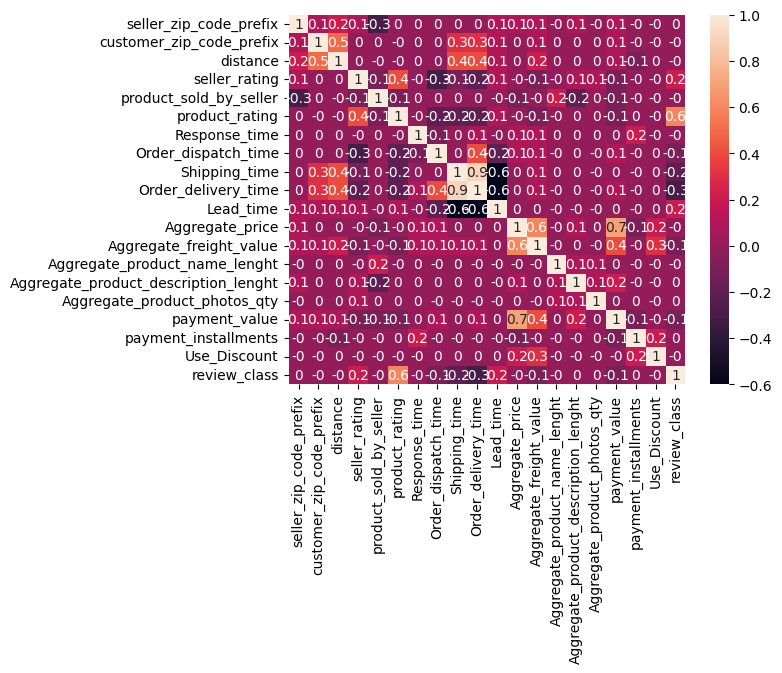

In [ ]:
import seaborn as sns

correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr().round(1)

# Draw heat map
sns.heatmap(data=correlation_matrix, annot=True)

In [ ]:
df = df.drop('Shipping_time',axis=1) # Order_delivery_time has high correlation with shipping_time while it has more stong effect to target value
df = df.drop('Aggregate_price',axis=1) # Payment_value has high correlation with Aggregate_price while it has more stong effect to target value

In [ ]:
# Calculate Correlation efficients among specific types of features
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Use 'review_class' to check Correlation as it is our target value
review_score_correlation = correlation_matrix['review_class'].round(1)
print(review_score_correlation)

seller_zip_code_prefix                  0.0
customer_zip_code_prefix               -0.0
distance                               -0.0
seller_rating                           0.2
product_sold_by_seller                 -0.0
product_rating                          0.6
Response_time                          -0.0
Order_dispatch_time                    -0.1
Order_delivery_time                    -0.3
Lead_time                               0.2
Aggregate_freight_value                -0.1
Aggregate_product_name_lenght          -0.0
Aggregate_product_description_lenght    0.0
Aggregate_product_photos_qty            0.0
payment_value                          -0.1
payment_installments                    0.0
Use_Discount                           -0.0
review_class                            1.0
Name: review_class, dtype: float64


In [ ]:
# Select Feature：seller_rating,product_rating,Order_dispatch_time,Order_delivery_time,Lead_time,Aggregate_freight_value,payment_value,

# Keep feature we selected
df = df.loc[:, ['order_id', 'seller_rating', 'product_rating','Order_dispatch_time','Order_delivery_time',
                'Lead_time','Aggregate_freight_value','payment_value','review_class']]

df.head()

,order_id,seller_rating,product_rating,Order_dispatch_time,Order_delivery_time,Lead_time,Aggregate_freight_value,payment_value,review_class
0,00010242fe8c5a6d1ba2dd792cb16214,3.906040,3.666667,6.0,7.0,8.0,13.29,72.19,1
1,bd31b009e1dbc47fc7c250b1e2cf5440,3.755303,3.166667,0.0,14.0,12.0,22.95,75.85,0
2,bb4eb0196897c20281a61f75ce23211c,3.755303,4.500000,2.0,10.0,11.0,15.42,111.42,1
3,f9847bf9cc7336c6ba07fe2bdbb6cae1,3.812658,3.921053,0.0,12.0,12.0,13.30,139.20,1
4,5c94ad4e194c0e6794688a9d2b9ea94b,4.077586,4.462121,1.0,31.0,-11.0,18.23,48.13,0


In [ ]:
df.dtypes

order_id                    object
seller_rating              float64
product_rating             float64
Order_dispatch_time        float64
Order_delivery_time        float64
Lead_time                  float64
Aggregate_freight_value    float64
payment_value              float64
review_class                 int64
dtype: object

### Using RobustScaler to exclude extreme values' effects

In [ ]:
from sklearn.preprocessing import RobustScaler
import pandas as pd

scaler = RobustScaler()

columns_to_scale = df.select_dtypes(include=['float64']).columns

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
df.shape

(102228, 9)

In [ ]:
df.isnull().sum()

order_id                   0
seller_rating              0
product_rating             0
Order_dispatch_time        0
Order_delivery_time        0
Lead_time                  0
Aggregate_freight_value    0
payment_value              0
review_class               0
dtype: int64

In [ ]:
X = df.iloc[:,1:8]
Y= df.iloc[:,-1]

In [ ]:
# split data into training and test
from sklearn.model_selection  import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

# print the shapes to check everything is OK
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(81782, 7)
(20446, 7)
(81782,)
(20446,)


In [ ]:
# Check how many categories in the review_class:
Categories_ratings = Y.unique()

print("Categories that rating have：", Categories_ratings)

Categories that rating have： [1 0]


In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Check Distribution of 1 and 0 in Y （target value) to make sure our dataset is balanced:

print("Original Distribution:", Counter(Y_train))

Original Distribution: Counter({1: 62474, 0: 19308})


There are many "low" score in our trian_Y,so we will balance data:

In [ ]:
# balance the train data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
resampled_train_x, resampled_train_y = oversampler.fit_resample(X_train, Y_train)

In [ ]:
# balanced_df
balanced_df = pd.DataFrame(resampled_train_x, columns = df.drop(columns=['review_class']).columns)
balanced_df['review_class'] = resampled_train_y

In [ ]:
# Check the distribution:
print("Balanced Distribution:", Counter(resampled_train_y))

Balanced Distribution: Counter({1: 62474, 0: 62474})


### Using Random Forest Classification to predict

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
rf_classifier = RandomForestClassifier()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report

# Predictions in trained dataset
rf_classifier.fit(resampled_train_x, resampled_train_y)

# Predictions on test dataset
Y_pred = rf_classifier.predict(X_test)

Y_pred_train = rf_classifier.predict(resampled_train_x)

In [ ]:
#  Use related indicators to evaluate testing efficiency:

from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, Y_pred)
print("Precision:", precision)
recall = recall_score(Y_test, Y_pred)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

Accuracy: 0.8710261175780104
Precision: 0.8989880291250154
Recall: 0.9357697989594708
F1_score: 0.9170102281667978


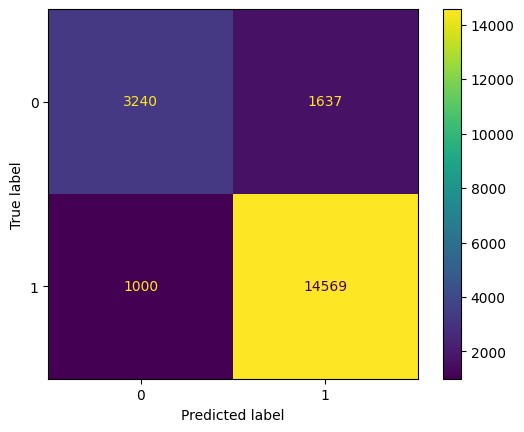

In [ ]:
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# build a confusion matrix
cm = confusion_matrix(Y_test, Y_pred, labels=rf_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_classifier.classes_)

disp.plot()
plt.show()

### To avoid over-fitting of model, we use k-fold cross-validation to assess model performance

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()

# Define K value（If we set: k=5）
k_fold = 5
scores = cross_val_score(rf_classifier, X, Y, cv=k_fold, scoring='accuracy')

# print Accuracy in each test： RandomForestClassifier function
print("Cross-Validation Accuracy Scores:", scores)

# Calculate average value of these tests：

avg_accuracy = scores.mean()
print("accuracy:", avg_accuracy)

Cross-Validation Accuracy Scores: [0.85371222 0.84725619 0.84544654 0.84446075 0.8480313 ]
accuracy: 0.8477813997070512


# Voting model

In [ ]:
# Create three basic
lr = LogisticRegression()
lr.fit(resampled_train_x, resampled_train_y)
gnb = GaussianNB()
gnb.fit(resampled_train_x, resampled_train_y)
rf = RandomForestClassifier(n_estimators=50)
rf.fit(resampled_train_x, resampled_train_y)

# Creat VotingClassifier
voting_clf = VotingClassifier(
    estimators=[('lr', lr), ('gnb', gnb), ('rf', rf)],
    voting='hard'
)

# train model
voting_clf.fit(resampled_train_x, resampled_train_y)

# predict on test data
y_pred_voting = voting_clf.predict(X_test)


# Evaluate model
accuracy_voting = accuracy_score(Y_test, y_pred_voting)
print("Accuracy: ", accuracy_voting)

# Precision
precision_voting = precision_score(Y_test, y_pred_voting)
print("Precision:", precision_voting)

# Recall
recall_voting = recall_score(Y_test, y_pred_voting)
print("Recall:", recall_voting)

# F1 score
F1_score_voting = 2 * (precision * recall) / (precision + recall)
print("F1 score:",F1_score_voting)

In [ ]:
# build a confusion matrix for Voting Classifier
cm = confusion_matrix(Y_test, y_pred_voting, labels=voting_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=voting_clf.classes_)

disp.plot()
plt.show()

# Logistics

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Create Logistics Model
classifier = LogisticRegression()
classifier.fit(resampled_train_x, resampled_train_y)

# Predict test set result
y_pred_Logistics = classifier.predict(X_test)

# Evaluate the model performance
# Accuracy
print("Accuracy:", accuracy_score(Y_test, y_pred_Logistics))

# Precision
precision_Logistics = precision_score(Y_test, y_pred_Logistics)
print("Precision:", precision_Logistics)

# Recall
recall_Logistics = recall_score(Y_test, y_pred_Logistics)
print("Recall:", recall_Logistics)

# F1 score
F1_score_Logistics = 2 * (precision * recall) / (precision + recall)
print("F1 score:",F1_score_Logistics)

In [ ]:
# build a confusion matrix
cm = confusion_matrix(Y_test, y_pred_Logistics, labels=classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=classifier.classes_)

disp.plot()
plt.show()

# SVM

In [ ]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(resampled_train_x, resampled_train_y)
# prediction of test data
predictions_SVM = clf.predict(X_test)
# prediction of train data
Y_pred_train_SVM = clf.predict(resampled_train_x)

In [ ]:
# tell the accuracy of test data
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(Y_test, predictions_SVM)
print("Accuracy:", accuracy)
precision = precision_score(Y_test, predictions_SVM)
print("Precision:", precision)
recall = recall_score(Y_test, predictions_SVM)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

In [ ]:
# tell the accuracy of train data
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(resampled_train_y, Y_pred_train_SVM)
print("Accuracy:", accuracy)
precision = precision_score(resampled_train_y, Y_pred_train_SVM)
print("Precision:", precision)
recall = recall_score(resampled_train_y, Y_pred_train_SVM)
print("Recall:", recall)
F1_score = 2 * (precision * recall) / (precision + recall)
print("F1_score:", F1_score)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# build a confusion matrix
cm = confusion_matrix(Y_test, predictions_SVM, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=clf.classes_)

disp.plot()
plt.show()